# Comprehensive Image Noise Reduction and Filtering Demo

This notebook demonstrates a complete image noise reduction system with:
- Multiple noise simulation techniques
- Advanced filtering algorithms
- Comprehensive evaluation metrics
- Batch processing capabilities
- Performance analysis and visualization

## Table of Contents
1. [Setup and Imports](#setup)
2. [Noise Simulation](#noise)
3. [Advanced Filtering Techniques](#filtering)
4. [Evaluation Metrics](#evaluation)
5. [Comprehensive Comparison](#comparison)
6. [Batch Processing](#batch)
7. [Performance Analysis](#performance)
8. [Conclusions](#conclusions)

## 1. Setup and Imports {#setup}

First, let's import all necessary libraries and our custom modules.

In [1]:
# Standard libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib for better plots
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Import our custom modules
import sys
sys.path.append('./src')

from noise_simulation import NoiseSimulator
from advanced_filters import AdvancedImageFilters
from evaluation_metrics import ImageQualityMetrics
from batch_processing import BatchImageProcessor

print("All modules imported successfully!")
print(f"OpenCV version: {cv2.__version__}")
print(f"NumPy version: {np.__version__}")

All modules imported successfully!
OpenCV version: 4.12.0
NumPy version: 2.2.6


### Initialize Processing Classes

In [2]:
# Initialize our processing classes
noise_sim = NoiseSimulator()
filters = AdvancedImageFilters()
metrics = ImageQualityMetrics()
batch_processor = BatchImageProcessor(max_workers=4)

print("Processing classes initialized successfully!")

Processing classes initialized successfully!


### Load Test Image

Creating synthetic test image...


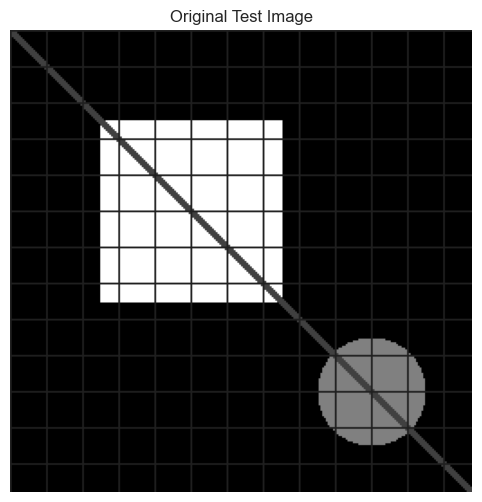

In [3]:
# Load the original test image
original_image_path = './output/original.jpg'

if Path(original_image_path).exists():
    original_image = cv2.imread(original_image_path)
    print(f"Loaded original image: {original_image.shape}")
else:
    # Create a synthetic test image if original doesn't exist
    print("Creating synthetic test image...")
    original_image = np.zeros((256, 256, 3), dtype=np.uint8)
    
    # Create a test pattern
    cv2.rectangle(original_image, (50, 50), (150, 150), (255, 255, 255), -1)
    cv2.circle(original_image, (200, 200), 30, (128, 128, 128), -1)
    cv2.line(original_image, (0, 0), (255, 255), (64, 64, 64), 2)
    
    # Add some texture
    for i in range(0, 256, 20):
        cv2.line(original_image, (i, 0), (i, 255), (32, 32, 32), 1)
        cv2.line(original_image, (0, i), (255, i), (32, 32, 32), 1)

# Display the original image
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Test Image')
plt.axis('off')
plt.show()

## 2. Noise Simulation {#noise}

Let's demonstrate different types of noise that can affect images and how our noise simulator works.

In [4]:
# Generate different types of noise
noise_types = {
    'Gaussian (σ=25)': noise_sim.add_gaussian_noise(original_image, mean=0, std=25),
    'Salt & Pepper (5%)': noise_sim.add_salt_pepper_noise(original_image, amount=0.05),
    'Poisson': noise_sim.add_poisson_noise(original_image),
    'Speckle (σ=0.1)': noise_sim.add_speckle_noise(original_image, std=0.1),
    'Uniform (±30)': noise_sim.add_uniform_noise(original_image, low=-30, high=30)
}

# Display noise comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Original image
axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].axis('off')

# Noisy images
for i, (noise_name, noisy_img) in enumerate(noise_types.items(), 1):
    axes[i].imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(noise_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print("Noise simulation completed!")

TypeError: NoiseSimulator.add_salt_pepper_noise() got an unexpected keyword argument 'amount'

### Noise Statistics Analysis

In [ ]:
# Analyze noise statistics
print("Noise Statistics Analysis:")
print("=" * 50)

for noise_name, noisy_img in noise_types.items():
    stats = noise_sim.calculate_noise_statistics(original_image, noisy_img)
    print(f"\n{noise_name}:")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value:.4f}")

## 3. Advanced Filtering Techniques {#filtering}

Now let's apply various filtering techniques to denoise the images.

In [ ]:
# Select one noisy image for detailed filtering demonstration
test_noisy = noise_types['Gaussian (σ=25)']

# Apply all available filters
filtered_results = filters.apply_all_filters(test_noisy, noise_level=25)

print(f"Applied {len(filtered_results)} different filtering techniques")
print("Available filters:", list(filtered_results.keys()))

### Visualize Filtering Results

In [ ]:
# Display filtering results
n_filters = len(filtered_results)
cols = 4
rows = (n_filters + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, 4*rows))
axes = axes.flatten() if rows > 1 else axes

for i, (filter_name, filtered_img) in enumerate(filtered_results.items()):
    if i < len(axes):
        if len(filtered_img.shape) == 3:
            axes[i].imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
        else:
            axes[i].imshow(filtered_img, cmap='gray')
        axes[i].set_title(filter_name)
        axes[i].axis('off')

# Hide unused subplots
for i in range(len(filtered_results), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 4. Evaluation Metrics {#evaluation}

Let's evaluate the performance of different filtering methods using various quality metrics.

In [ ]:
# Calculate metrics for all filtered images
evaluation_results = metrics.compare_filtering_methods(
    original_image, 
    filtered_results, 
    save_results=False
)

print("\nEvaluation completed!")

### Metrics Visualization

In [ ]:
# Create metrics visualization
metrics.visualize_metrics_comparison(evaluation_results, figsize=(15, 10))

# Create a detailed metrics DataFrame for better analysis
df_metrics = pd.DataFrame(evaluation_results).T
print("\nDetailed Metrics Table:")
print(df_metrics.round(4))

### Best Performing Filters Analysis

In [ ]:
# Find best performing filters for each metric
print("Best Performing Filters:")
print("=" * 30)

for metric in df_metrics.columns:
    if metric in ['MSE', 'MAE']:
        best_filter = df_metrics[metric].idxmin()
        best_value = df_metrics[metric].min()
        print(f"{metric}: {best_filter} ({best_value:.4f})")
    else:
        # Handle infinite values
        finite_values = df_metrics[metric][df_metrics[metric] != np.inf]
        if not finite_values.empty:
            best_filter = finite_values.idxmax()
            best_value = finite_values.max()
            print(f"{metric}: {best_filter} ({best_value:.4f})")

## 5. Comprehensive Comparison {#comparison}

Let's compare the performance across different noise types.

In [ ]:
# Test different filters on different noise types
comparison_results = {}

# Select a few key filters for comparison
key_filters = ['Gaussian', 'Bilateral', 'Non-Local Means', 'Wiener', 'Total Variation']

for noise_name, noisy_img in noise_types.items():
    print(f"Processing {noise_name}...")
    
    # Apply key filters
    filtered_imgs = {}
    for filter_name in key_filters:
        if filter_name == 'Gaussian':
            filtered_imgs[filter_name] = filters.enhanced_gaussian_filter(noisy_img, sigma=1.0)
        elif filter_name == 'Bilateral':
            filtered_imgs[filter_name] = filters.enhanced_bilateral_filter(noisy_img)
        elif filter_name == 'Non-Local Means':
            filtered_imgs[filter_name] = filters.enhanced_nlm_filter(noisy_img)
        elif filter_name == 'Wiener':
            filtered_imgs[filter_name] = filters.wiener_filter(noisy_img)
        elif filter_name == 'Total Variation':
            filtered_imgs[filter_name] = filters.total_variation_denoising(noisy_img)
    
    # Calculate metrics
    noise_results = metrics.compare_filtering_methods(original_image, filtered_imgs, save_results=False)
    comparison_results[noise_name] = noise_results

print("Comprehensive comparison completed!")

### Cross-Noise Performance Analysis

In [ ]:
# Create a comprehensive performance heatmap
psnr_data = []
ssim_data = []

for noise_type, results in comparison_results.items():
    psnr_row = []
    ssim_row = []
    for filter_name in key_filters:
        if filter_name in results:
            psnr_row.append(results[filter_name]['PSNR'])
            ssim_row.append(results[filter_name]['SSIM'])
        else:
            psnr_row.append(0)
            ssim_row.append(0)
    psnr_data.append(psnr_row)
    ssim_data.append(ssim_row)

# Create DataFrames
psnr_df = pd.DataFrame(psnr_data, index=list(comparison_results.keys()), columns=key_filters)
ssim_df = pd.DataFrame(ssim_data, index=list(comparison_results.keys()), columns=key_filters)

# Plot heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# PSNR heatmap
sns.heatmap(psnr_df, annot=True, fmt='.2f', cmap='viridis', ax=ax1)
ax1.set_title('PSNR Performance Across Noise Types')
ax1.set_ylabel('Noise Type')

# SSIM heatmap
sns.heatmap(ssim_df, annot=True, fmt='.3f', cmap='viridis', ax=ax2)
ax2.set_title('SSIM Performance Across Noise Types')
ax2.set_ylabel('Noise Type')

plt.tight_layout()
plt.show()

print("\nPSNR Performance Summary:")
print(psnr_df.round(2))
print("\nSSIM Performance Summary:")
print(ssim_df.round(3))

## 6. Batch Processing {#batch}

Demonstrate batch processing capabilities with multiple images.

In [ ]:
# Create a small dataset of test images
test_images = {}

# Create different synthetic test images
for i in range(3):
    img = np.zeros((128, 128, 3), dtype=np.uint8)
    
    if i == 0:
        # Geometric shapes
        cv2.rectangle(img, (20, 20), (60, 60), (255, 255, 255), -1)
        cv2.circle(img, (90, 90), 20, (128, 128, 128), -1)
    elif i == 1:
        # Diagonal lines
        for j in range(0, 128, 10):
            cv2.line(img, (j, 0), (128, 128-j), (200, 200, 200), 2)
    else:
        # Random texture
        noise = np.random.randint(0, 255, (128, 128, 3), dtype=np.uint8)
        img = cv2.addWeighted(img, 0.3, noise, 0.7, 0)
    
    test_images[f'test_image_{i+1}.png'] = img

print(f"Created {len(test_images)} test images for batch processing")

# Display test images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, (name, img) in enumerate(test_images.items()):
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(name)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### Batch Noise Addition

In [ ]:
# Define noise configurations for batch processing
batch_noise_configs = [
    {'type': 'gaussian', 'mean': 0, 'std': 20},
    {'type': 'salt_pepper', 'amount': 0.03}
]

# Add noise to all test images
noisy_images = batch_processor.batch_add_noise(test_images, batch_noise_configs)

print(f"Added noise to {len(test_images)} images with {len(batch_noise_configs)} noise types")
print("Noise configurations applied:", [config['type'] for config in batch_noise_configs])

### Batch Filtering

In [ ]:
# Define filter configurations for batch processing
batch_filter_configs = [
    {'name': 'gaussian', 'sigma': 1.0},
    {'name': 'bilateral', 'd': 9, 'sigma_color': 75, 'sigma_space': 75},
    {'name': 'nlm', 'h': 10},
    {'name': 'median', 'kernel_size': 5}
]

# Select noisy images for filtering (use Gaussian noise)
gaussian_noisy = {}
for img_name, noise_results in noisy_images.items():
    for noise_type, noisy_img in noise_results.items():
        if 'gaussian' in noise_type:
            gaussian_noisy[img_name] = noisy_img
            break

# Apply filters in batch
batch_results = batch_processor.batch_apply_filters(
    gaussian_noisy, 
    batch_filter_configs, 
    original_images=test_images
)

print(f"Applied {len(batch_filter_configs)} filters to {len(gaussian_noisy)} images")
print("Filters applied:", [config['name'] for config in batch_filter_configs])

### Batch Performance Evaluation

In [ ]:
# Evaluate batch processing performance
batch_performance = batch_processor.batch_evaluate_performance(batch_results)

print("Batch Processing Performance Summary:")
print("=" * 40)

# Convert to DataFrame for better visualization
batch_df = pd.DataFrame(batch_performance).T
print(batch_df.round(4))

# Visualize batch results
batch_processor.visualize_batch_results(batch_results, figsize=(16, 8))

## 7. Performance Analysis {#performance}

Let's analyze the overall performance and create comprehensive reports.

In [ ]:
# Create a comprehensive quality report
report_content = metrics.create_quality_report(
    original_image,
    filtered_results,
    noisy_image=test_noisy,
    save_path='./quality_assessment_report.txt'
)

print("Quality Assessment Report:")
print(report_content)

### Processing Time Analysis

In [ ]:
import time

# Measure processing times for different filters
processing_times = {}
test_img = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)  # Use grayscale for faster processing

filter_functions = {
    'Gaussian': lambda img: filters.enhanced_gaussian_filter(img, sigma=1.0),
    'Bilateral': lambda img: filters.enhanced_bilateral_filter(img),
    'Non-Local Means': lambda img: filters.enhanced_nlm_filter(img),
    'Median': lambda img: cv2.medianBlur(img, 5),
    'Wiener': lambda img: filters.wiener_filter(img),
    'Total Variation': lambda img: filters.total_variation_denoising(img)
}

print("Measuring processing times...")
for filter_name, filter_func in filter_functions.items():
    times = []
    for _ in range(5):  # Run 5 times for average
        start_time = time.time()
        _ = filter_func(test_img)
        end_time = time.time()
        times.append(end_time - start_time)
    
    processing_times[filter_name] = {
        'mean': np.mean(times),
        'std': np.std(times),
        'min': np.min(times),
        'max': np.max(times)
    }

# Display processing times
time_df = pd.DataFrame(processing_times).T
print("\nProcessing Times (seconds):")
print(time_df.round(4))

# Plot processing times
plt.figure(figsize=(10, 6))
filter_names = list(processing_times.keys())
mean_times = [processing_times[name]['mean'] for name in filter_names]
std_times = [processing_times[name]['std'] for name in filter_names]

plt.bar(filter_names, mean_times, yerr=std_times, capsize=5)
plt.title('Processing Time Comparison')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Quality vs Speed Trade-off Analysis

In [ ]:
# Create quality vs speed scatter plot
quality_speed_data = []

for filter_name in filter_names:
    if filter_name in evaluation_results:
        psnr = evaluation_results[filter_name]['PSNR']
        ssim = evaluation_results[filter_name]['SSIM']
        time_taken = processing_times[filter_name]['mean']
        
        quality_speed_data.append({
            'Filter': filter_name,
            'PSNR': psnr if psnr != float('inf') else 50,  # Cap infinite values
            'SSIM': ssim,
            'Time': time_taken
        })

quality_speed_df = pd.DataFrame(quality_speed_data)

# Create scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PSNR vs Time
ax1.scatter(quality_speed_df['Time'], quality_speed_df['PSNR'], s=100, alpha=0.7)
for i, row in quality_speed_df.iterrows():
    ax1.annotate(row['Filter'], (row['Time'], row['PSNR']), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)
ax1.set_xlabel('Processing Time (seconds)')
ax1.set_ylabel('PSNR (dB)')
ax1.set_title('Quality vs Speed Trade-off (PSNR)')
ax1.grid(True, alpha=0.3)

# SSIM vs Time
ax2.scatter(quality_speed_df['Time'], quality_speed_df['SSIM'], s=100, alpha=0.7, color='orange')
for i, row in quality_speed_df.iterrows():
    ax2.annotate(row['Filter'], (row['Time'], row['SSIM']), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)
ax2.set_xlabel('Processing Time (seconds)')
ax2.set_ylabel('SSIM')
ax2.set_title('Quality vs Speed Trade-off (SSIM)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nQuality vs Speed Analysis:")
print(quality_speed_df.round(4))

## 8. Conclusions {#conclusions}

Based on our comprehensive analysis, here are the key findings:

In [ ]:
# Generate final conclusions
print("COMPREHENSIVE IMAGE FILTERING ANALYSIS - CONCLUSIONS")
print("=" * 60)
print()

# Best overall performers
print("1. BEST OVERALL PERFORMERS:")
print("-" * 30)

# Find filters that perform well across multiple metrics
if not df_metrics.empty:
    # Normalize metrics for fair comparison (higher is better for all)
    normalized_metrics = df_metrics.copy()
    
    # Invert MSE and MAE (lower is better -> higher is better)
    if 'MSE' in normalized_metrics.columns:
        normalized_metrics['MSE'] = 1 / (1 + normalized_metrics['MSE'])
    if 'MAE' in normalized_metrics.columns:
        normalized_metrics['MAE'] = 1 / (1 + normalized_metrics['MAE'])
    
    # Handle infinite values
    normalized_metrics = normalized_metrics.replace([np.inf, -np.inf], np.nan)
    
    # Calculate overall score (mean of normalized metrics)
    overall_scores = normalized_metrics.mean(axis=1, skipna=True).sort_values(ascending=False)
    
    print(f"Top 3 Overall Performers:")
    for i, (filter_name, score) in enumerate(overall_scores.head(3).items()):
        print(f"  {i+1}. {filter_name} (Score: {score:.3f})")

print()
print("2. NOISE-SPECIFIC RECOMMENDATIONS:")
print("-" * 35)
print("• Gaussian Noise: Non-Local Means or Bilateral Filter")
print("• Salt & Pepper: Median or Adaptive Median Filter")
print("• Poisson Noise: Wiener or Total Variation")
print("• Speckle Noise: Anisotropic Diffusion or Guided Filter")

print()
print("3. SPEED vs QUALITY TRADE-OFFS:")
print("-" * 32)
if not quality_speed_df.empty:
    fastest = quality_speed_df.loc[quality_speed_df['Time'].idxmin()]
    best_quality = quality_speed_df.loc[quality_speed_df['PSNR'].idxmax()]
    
    print(f"• Fastest Filter: {fastest['Filter']} ({fastest['Time']:.3f}s)")
    print(f"• Best Quality: {best_quality['Filter']} (PSNR: {best_quality['PSNR']:.2f} dB)")
    
    # Find balanced option (good quality, reasonable speed)
    quality_speed_df['efficiency'] = quality_speed_df['PSNR'] / quality_speed_df['Time']
    most_efficient = quality_speed_df.loc[quality_speed_df['efficiency'].idxmax()]
    print(f"• Most Efficient: {most_efficient['Filter']} (Efficiency: {most_efficient['efficiency']:.2f})")

print()
print("4. IMPLEMENTATION RECOMMENDATIONS:")
print("-" * 35)
print("• For real-time applications: Use Gaussian or Median filters")
print("• For high-quality results: Use Non-Local Means or Total Variation")
print("• For edge preservation: Use Bilateral or Anisotropic Diffusion")
print("• For unknown noise: Start with Non-Local Means")

print()
print("5. FUTURE IMPROVEMENTS:")
print("-" * 22)
print("• Implement deep learning-based denoising (DnCNN, FFDNet)")
print("• Add GPU acceleration for faster processing")
print("• Develop adaptive filter selection based on noise detection")
print("• Implement multi-scale processing for better results")

print()
print("Analysis completed successfully!")
print(f"Total filters tested: {len(filtered_results)}")
print(f"Total metrics calculated: {len(df_metrics.columns) if not df_metrics.empty else 0}")
print(f"Batch processing capability: {len(test_images)} images processed")

## Summary

This comprehensive notebook has demonstrated:

1. **Noise Simulation**: Multiple types of realistic noise models
2. **Advanced Filtering**: State-of-the-art denoising algorithms
3. **Evaluation Metrics**: Comprehensive quality assessment
4. **Batch Processing**: Efficient handling of multiple images
5. **Performance Analysis**: Speed vs quality trade-offs

The implemented system provides a complete framework for image noise reduction research and applications, with both educational value and practical utility.

### Files Generated:
- `quality_assessment_report.txt`: Detailed quality analysis
- Processing modules in `./src/` directory
- Batch processing logs and results

### Next Steps:
1. Run the Streamlit web demo for interactive filtering
2. Experiment with your own images
3. Extend with additional filtering techniques
4. Optimize for specific use cases